## Classification Assignment- 2
In this Assignment, you will implement two classification machine learning algorithms Logistic Regression & Naive Bayes for the dataset (Liver disease dataset),
You will have 9 marks to implement both. Also, Compare the performance of each Algorithm
Dataset: liver_disease_1.csv 
The marks distribution is as follows
A.	Import the libraries and Load the dataset and Remove/replace missing values (if any) [1 M]
B.	Split features and labels [0.5 M]
C.	Split train and test data [0.5 M}
Implement the Naïve Bayes classifier using Python
Implement Naïve Bayes Classifier [2 M]
Calculate accuracy measures [1 M]
Implement classification using Logistic Regression using Python
Implement Logistic regression Classifier [2 M]
Calculate accuracy measures [1 M]
Compare the results and accuracies for both the algorithms and share your inferences. [1M]


# (A)	COLLECT / EXTRACT DATA

Below table was created while trying to understand various feature attributes and get more insights about them like data type of values, range, derived attributes, attributes that needs conversion, and categorical number using excel. So we can use these for feature engineering.

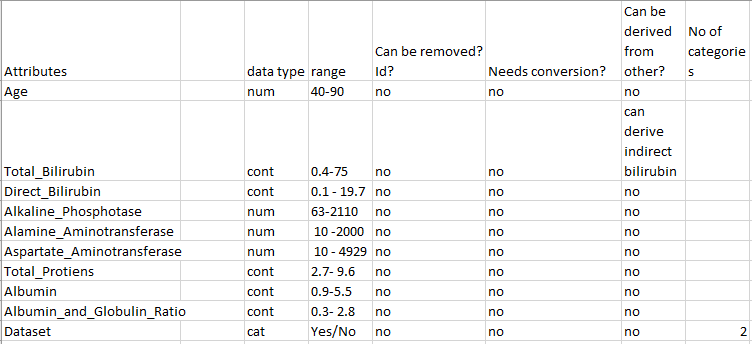

# 1. Import libraries

In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_ind, ttest_rel
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, log_loss
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Data

In [3]:
# Preprocessing Input data
df = pd.read_csv("liver_disease_1.csv")
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
df.rename(columns={'Dataset': 'Outcome'}, inplace=True)

In [5]:
df = df.replace({'Outcome': {'Yes': 1,  
                                'No': 0}}) 

In [6]:
df.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Outcome                         int64
dtype: object

## 3.a. Describe the dataset

In [7]:
#Describe the dataset
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Data seems well distributed

In [8]:
#look at random sample
df.sample(15)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
545,45,0.7,0.2,153,41,42,4.5,2.2,0.90,0
51,34,0.6,0.1,161,15,19,6.6,3.4,1.00,1
380,50,1.7,0.8,331,36,53,7.3,3.4,0.90,1
89,60,4.0,1.9,238,119,350,7.1,3.3,0.80,1
356,33,0.7,0.2,256,21,30,8.5,3.9,0.80,1
101,27,0.7,0.2,243,21,23,5.3,2.3,0.70,0
166,55,75.0,3.6,332,40,66,6.2,2.5,0.60,1
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,1
149,60,0.8,0.2,286,21,27,7.1,4.0,1.20,1
94,60,5.2,2.4,168,126,202,6.8,2.9,0.70,1


In [9]:
#Check for shape of the data
df.shape

(583, 10)

## 3.b. Check for any null values in the dataset

In [10]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [11]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Outcome                       0
dtype: int64

In [12]:
#drop null values
df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True)

In [13]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Outcome                       0
dtype: int64

In [14]:
Zero_Not_Accepted = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

for column in Zero_Not_Accepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [15]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 3.c. Check for duplicate values in the dataset

In [16]:
#check for duplicates
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

13


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [17]:
#drop duplicates
df.drop_duplicates(inplace=True)

## 4.a. Univariate analysis of Numerical data

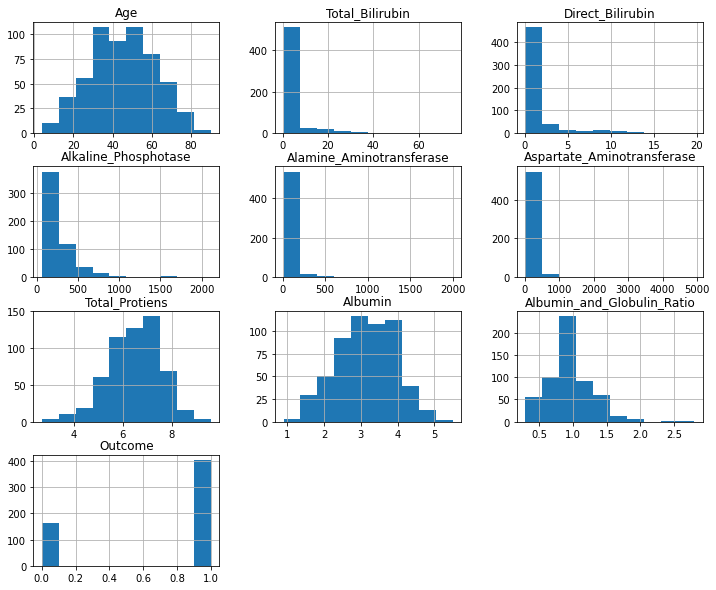

In [18]:
#plot histogram for attributes of type number(float and int)
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

Data seems well distributed. Direct globulin seems very similar to total globulin

## 4.b. Check for Outliers if any

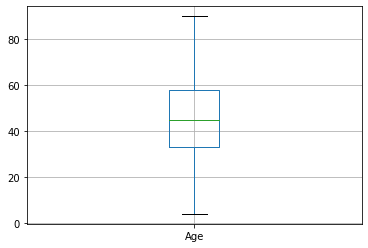

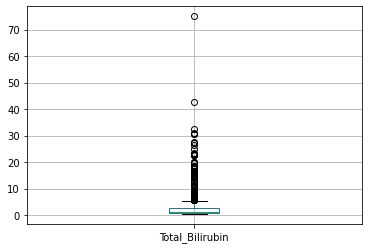

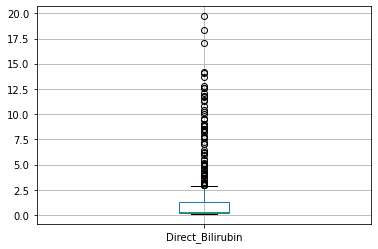

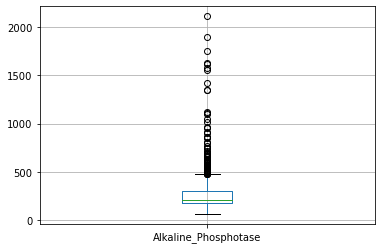

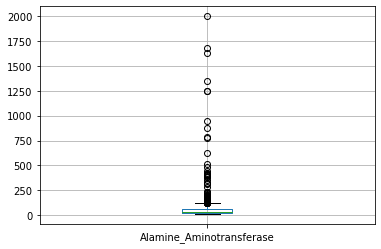

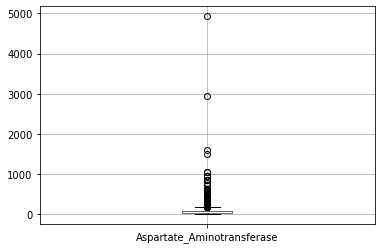

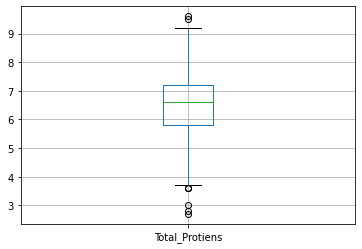

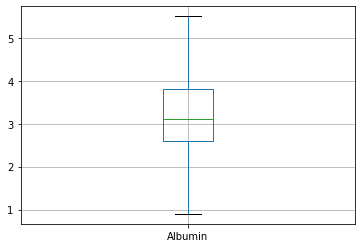

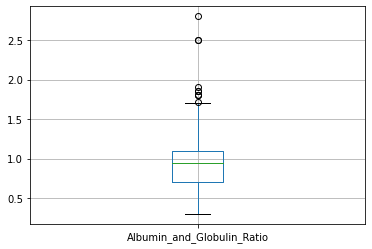

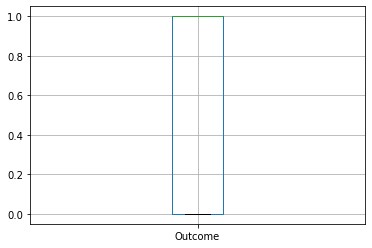

In [19]:
df_number = df.select_dtypes(include = 'number')
for col in df_number:
    df.boxplot(column=[col])
    plt.show()

#Lets remove some outliers from Total_Bilirubin and Aspartate_Aminotransferase

In [20]:
print(np.sum(df['Total_Bilirubin'] > 70))

1


In [21]:
#drop the outliers
df.drop(df[df['Total_Bilirubin'] > 70].index, inplace = True) 

In [22]:
print(np.sum(df['Total_Bilirubin'] > 70))

0


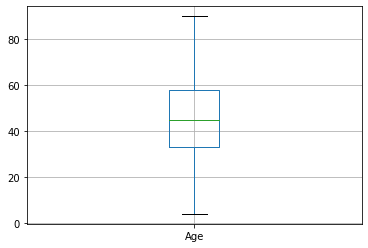

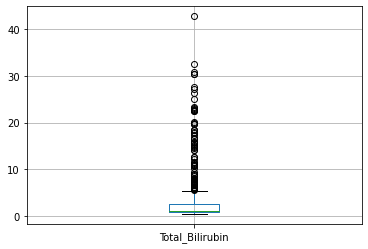

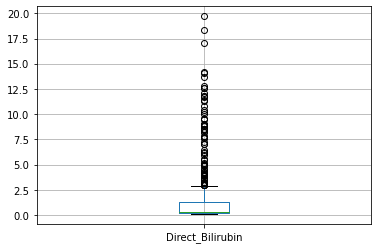

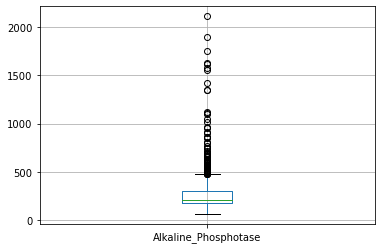

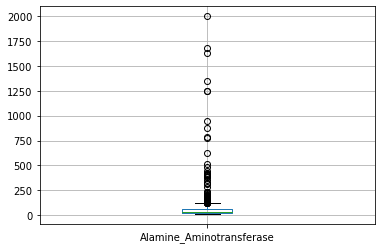

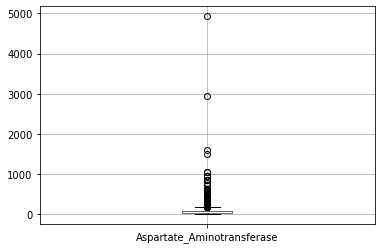

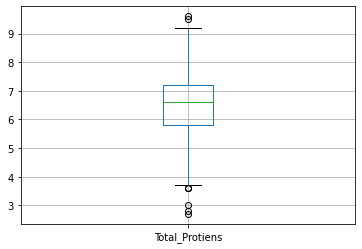

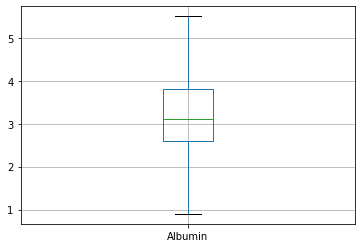

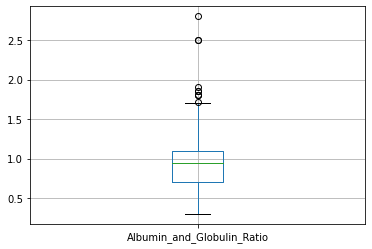

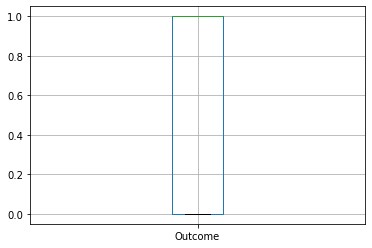

In [23]:
df_number = df.select_dtypes(include = 'number')
for col in df_number:
    df.boxplot(column=[col])
    plt.show()

In [24]:
print(np.sum(df['Aspartate_Aminotransferase'] > 4000))

1


In [25]:
#drop the outliers
df.drop(df[df['Aspartate_Aminotransferase'] > 4000].index, inplace = True) 

In [26]:
print(np.sum(df['Aspartate_Aminotransferase'] > 4000))

0


## 4.c. Find co-relation between feature set

In [27]:
#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df.corr('spearman')
print(spearman_corr)

                                 Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.114339          0.108067   
Total_Bilirubin             0.114339         1.000000          0.958575   
Direct_Bilirubin            0.108067         0.958575          1.000000   
Alkaline_Phosphotase        0.054893         0.384427          0.370015   
Alamine_Aminotransferase   -0.065718         0.437952          0.413919   
Aspartate_Aminotransferase -0.015327         0.506148          0.502629   
Total_Protiens             -0.188091        -0.025485         -0.026888   
Albumin                    -0.264580        -0.227100         -0.239590   
Albumin_and_Globulin_Ratio -0.246385        -0.286852         -0.301921   
Outcome                     0.122507         0.314286          0.309326   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.054893                 -0.065718   
Total_Bilirubin   

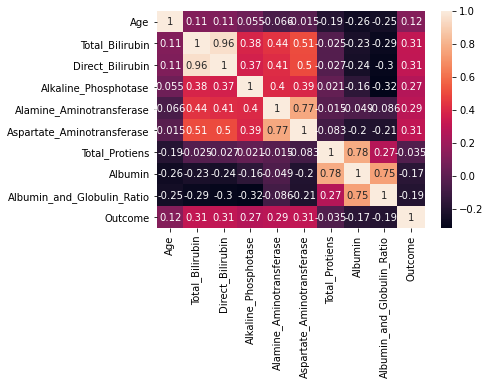

In [28]:
sns.heatmap(spearman_corr, annot=True)
plt.show()

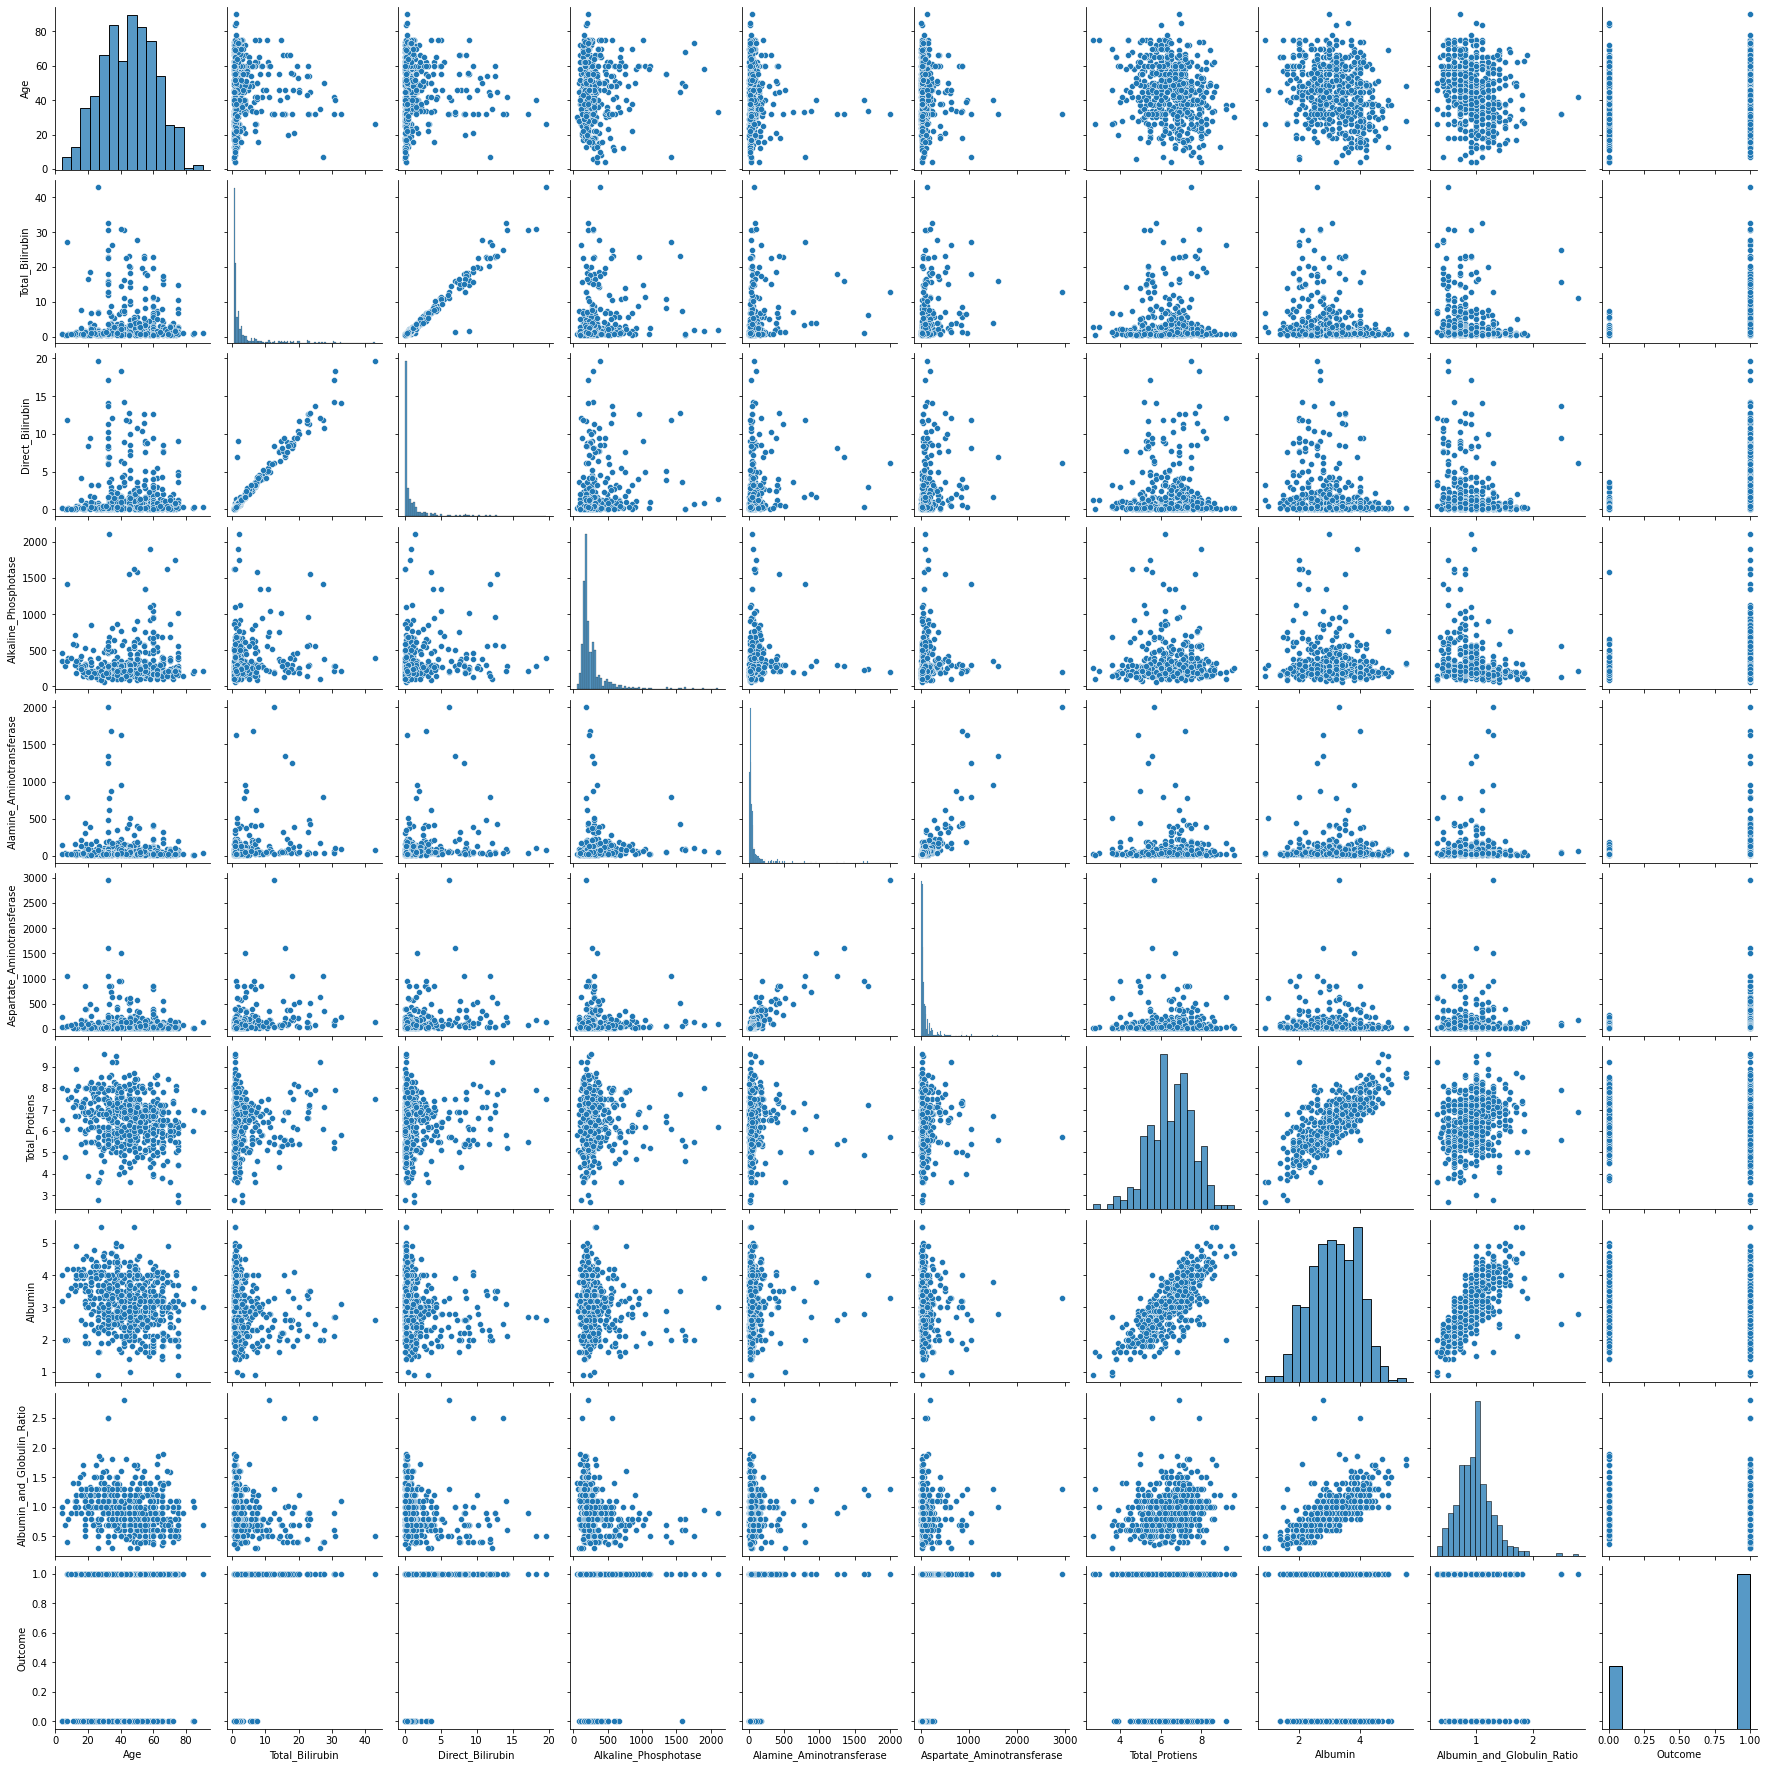

In [29]:
#Pairplot between features
sns.pairplot(df)

In [30]:
#Find correlation between features and plot heatmap for all the numerical values.
spearman_corr= df.corr('spearman')
print(spearman_corr)

#Flatten the corr matrix
df1 = spearman_corr.stack().reset_index()
df1.columns = ['FEATURE_1','FEATURE_2','corr']
# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df1['FEATURE_1']==df1['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df1 = df1[~mask_dups]
print(df1)



                                 Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.114339          0.108067   
Total_Bilirubin             0.114339         1.000000          0.958575   
Direct_Bilirubin            0.108067         0.958575          1.000000   
Alkaline_Phosphotase        0.054893         0.384427          0.370015   
Alamine_Aminotransferase   -0.065718         0.437952          0.413919   
Aspartate_Aminotransferase -0.015327         0.506148          0.502629   
Total_Protiens             -0.188091        -0.025485         -0.026888   
Albumin                    -0.264580        -0.227100         -0.239590   
Albumin_and_Globulin_Ratio -0.246385        -0.286852         -0.301921   
Outcome                     0.122507         0.314286          0.309326   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.054893                 -0.065718   
Total_Bilirubin   

In [31]:
#print those with corr = 1
print(df1[df1['corr'] >= 0.5])

                   FEATURE_1                   FEATURE_2      corr
12           Total_Bilirubin            Direct_Bilirubin  0.958575
15           Total_Bilirubin  Aspartate_Aminotransferase  0.506148
25          Direct_Bilirubin  Aspartate_Aminotransferase  0.502629
45  Alamine_Aminotransferase  Aspartate_Aminotransferase  0.771727
67            Total_Protiens                     Albumin  0.780070
78                   Albumin  Albumin_and_Globulin_Ratio  0.751905


## from heatmaps and corr tables
1. Total_Bilirubin and Direct_Bilirubin are highly co-rrelated with corr value of 0.95
2. Total_Bilirubin and Aspartate_Aminotransferase have corr value of 0.5
3. Alamine_Aminotransferase and Aspartate_Aminotransferase have corr value of 0.77
4. Total_Protiens and Albumin have corr value of 0.78
5. Albumin and Albumin_and_Globulin_Ratio have corr value of 0.75

In [32]:
#Determine the golden feature set by taking strong relationship between dependent and independent variable from the figured correlation.
spearman_corr_joined = df.corr('spearman')['Outcome']
golden_feature_list_spearman = spearman_corr_joined[abs(spearman_corr_joined) >= 0.3].sort_values(ascending=False)
print(golden_feature_list_spearman)

Outcome                       1.000000
Total_Bilirubin               0.314286
Direct_Bilirubin              0.309326
Aspartate_Aminotransferase    0.308044
Name: Outcome, dtype: float64


# features that are highly correlated with Target Variable are
Total_Bilirubin, Direct_Bilirubin and Aspartate_Aminotransferase

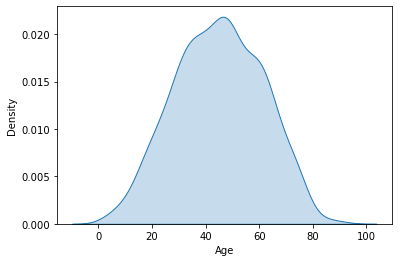

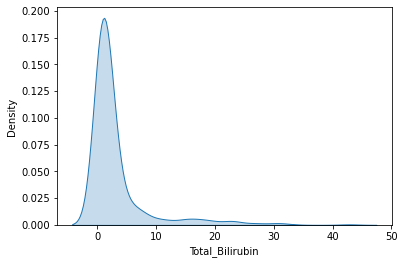

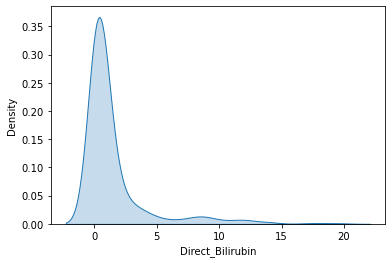

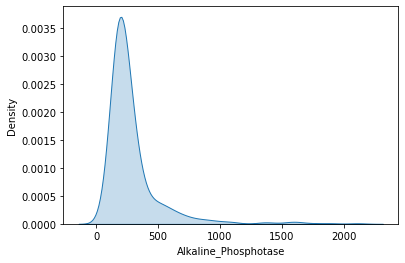

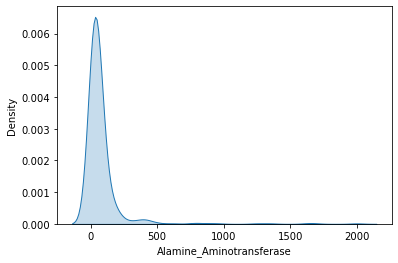

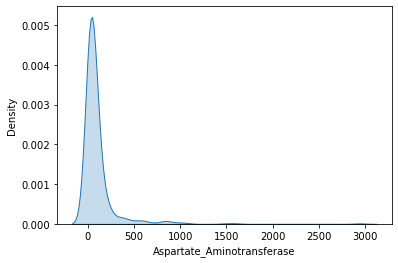

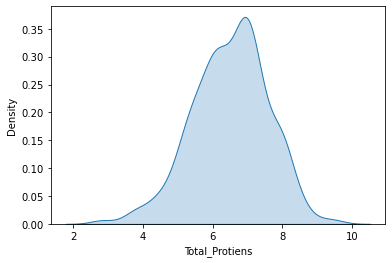

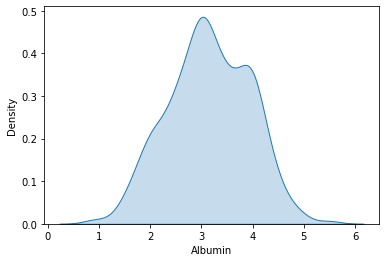

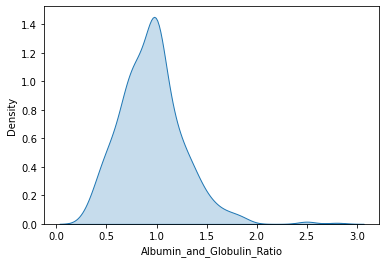

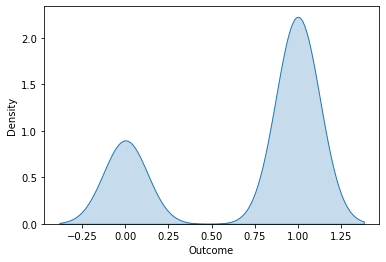

In [33]:
for i in df.select_dtypes(include='number').columns:
    sns.kdeplot(df[i],shade=True)
    plt.show()

# 5 MODEL BUILDING AND DIAGNOSTICS 

## 5.a. Using Naive Bayes Classifier

In [34]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [35]:
#Split features and labels 
X = df.iloc[:,0:9]
y = df.iloc[:,9]

In [36]:
# Do the test and train data split using stratify sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify = y, test_size=0.2)

Types of Naive Bayes Classifier:
    Multinomial Naive Bayes: This is mostly used for document classification problem, i.e., whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of
        words present int the document.
        Bernoulli Naive Bayes: This is similar to multinomial Naive Bayes but the predictor values are boolean variables. The parameters we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
            Gaussian Naive Bayes: When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution. Alternatively, a continuos feature could be discretized by binning its values, but doing so throws away information, and results could be sensitive to the binning scheme.

In [37]:
#import Library of multinomial model
from sklearn.naive_bayes import MultinomialNB

In [38]:
#create a multinomial classifier
MultinomialModel = MultinomialNB()

#train the model using the training sets
MultinomialModel.fit(X_train,y_train)

MultinomialNB()

In [39]:
#predict on test data
y_pred = MultinomialModel.predict(X_test)

In [40]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [41]:
#Evaluate Results
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  3],
       [49, 32]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
print('Multinomial Accuracy = ', accuracy_score(y_test,y_pred))

Multinomial Accuracy =  0.5398230088495575


In [43]:
#import library of Bernoulli Model
from sklearn.naive_bayes import BernoulliNB

In [44]:
#create a Bernoulli Classifier
BernoulliModel = BernoulliNB()

In [45]:
#train the model using the training sets
BernoulliModel.fit(X_train,y_train)

BernoulliNB()

In [46]:
#predict on test data
y_pred = BernoulliModel.predict(X_test)

In [47]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [48]:
#Evaluate Results
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 32],
       [ 0, 81]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
print('Bernoulli Accuracy = ', accuracy_score(y_test,y_pred))

Bernoulli Accuracy =  0.7168141592920354


In [50]:
#import library of Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

In [51]:
#create a Gaussian Classifier
GaussianModel = GaussianNB()

#train the model using the training sets
GaussianModel.fit(X_train,y_train)

GaussianNB()

In [52]:
#predict on test data
y_pred = GaussianModel.predict(X_test)

In [53]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [54]:
#Evaluate Results
cm = confusion_matrix(y_test,y_pred)
cm

array([[32,  0],
       [46, 35]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
print('Gaussian Accuracy = ', accuracy_score(y_test,y_pred))

Gaussian Accuracy =  0.5929203539823009


## 5.b.Implement the Naïve Bayes classifier using Python

In [56]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [57]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()


In [58]:
X_train.shape

(451, 9)

In [59]:
# train the model
x = NaiveBayesClassifier()


x.fit(X_train, y_train)


In [60]:
predictions = x.predict(X_test)

In [61]:
#Evaluate Results
cm = confusion_matrix(y_test,predictions)
cm

array([[32,  0],
       [54, 27]], dtype=int64)

In [62]:
 print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        32
           1       1.00      0.33      0.50        81

    accuracy                           0.52       113
   macro avg       0.69      0.67      0.52       113
weighted avg       0.82      0.52      0.51       113



In [63]:
#print accuracy
x.accuracy(y_test, predictions)

0.5221238938053098

In [64]:
x.classes, x.feature_nums, x.rows, x.count

(array([0, 1], dtype=int64), 9, 451, 2)

In [65]:
x.calc_prior(X_train, y_train)

array([0.28824834, 0.71175166])

In [66]:
#prior
x.prior

array([0.28824834, 0.71175166])

In [67]:
#get statistics
x.calc_statistics(X_train, y_train)

(array([[ 41.90769231,   1.14846154,   0.40076923, 224.63846154,
          34.24615385,  41.49230769,   6.49384615,   3.28461538,
           1.015     ],
        [ 46.12149533,   3.85638629,   1.85825545, 313.57009346,
         100.21806854, 130.34267913,   6.4834891 ,   3.09595016,
           0.93218069]]),
 array([[3.09360710e+02, 1.06926686e+00, 2.88999408e-01, 2.34626462e+04,
         7.32893254e+02, 1.51609609e+03, 1.09288521e+00, 5.80686391e-01,
         8.11573077e-02],
        [2.41496142e+02, 3.68764779e+01, 9.85028231e+00, 7.18369741e+04,
         4.68665630e+04, 6.75237829e+04, 1.17028814e+00, 6.18145593e-01,
         1.11568453e-01]]))

In [68]:
#print mean
x.mean

array([[ 41.90769231,   1.14846154,   0.40076923, 224.63846154,
         34.24615385,  41.49230769,   6.49384615,   3.28461538,
          1.015     ],
       [ 46.12149533,   3.85638629,   1.85825545, 313.57009346,
        100.21806854, 130.34267913,   6.4834891 ,   3.09595016,
          0.93218069]])

In [69]:
#print variance
x.var

array([[3.09360710e+02, 1.06926686e+00, 2.88999408e-01, 2.34626462e+04,
        7.32893254e+02, 1.51609609e+03, 1.09288521e+00, 5.80686391e-01,
        8.11573077e-02],
       [2.41496142e+02, 3.68764779e+01, 9.85028231e+00, 7.18369741e+04,
        4.68665630e+04, 6.75237829e+04, 1.17028814e+00, 6.18145593e-01,
        1.11568453e-01]])

## 6. Model building Using Logistic Regression

# 6.a. Implement classification using Logistic Regression using Python and sklearn.

Accuracy on test set by our model       :   76.10619469026548


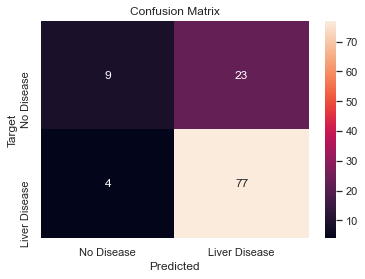

              precision    recall  f1-score   support

           0       0.69      0.28      0.40        32
           1       0.77      0.95      0.85        81

    accuracy                           0.76       113
   macro avg       0.73      0.62      0.63       113
weighted avg       0.75      0.76      0.72       113

Accuracy on test set by sklearn model   :   76.10619469026548


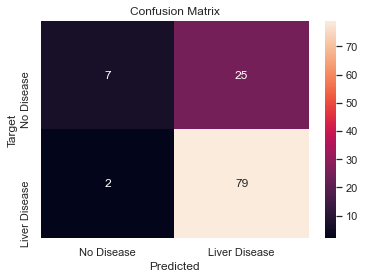

              precision    recall  f1-score   support

           0       0.78      0.22      0.34        32
           1       0.76      0.98      0.85        81

    accuracy                           0.76       113
   macro avg       0.77      0.60      0.60       113
weighted avg       0.76      0.76      0.71       113



In [70]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings( "ignore" ) 
  
# to compare our model's accuracy with sklearn model 
from sklearn.linear_model import LogisticRegression 
# Logistic Regression 
class LogitRegression() : 
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 
          
    # Function for model training     
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape         
        # weight initialization         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
          
        # calculate gradients         
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 
  
  
# Driver code 
  
def main() : 
      
    # Importing dataset     
    #df = pd.read_csv( "liver_disease_1.csv" ) 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split( 
      X, Y, test_size = 0.2, random_state = 42,stratify = y ) 

    # Model training     
    model = LogitRegression( learning_rate = 0.01, iterations = 3000 ) 
      
    model.fit( X_train, Y_train )     
    model1 = LogisticRegression()     
    model1.fit( X_train, Y_train) 
      
    # Prediction on test set 
    Y_pred = model.predict( X_test )     
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance     
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter     
    count = 0    
    for count in range( np.size( Y_pred ) ) :   
        
        if Y_test[count] == Y_pred[count] :             
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :             
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", (  
      correctly_classified / count ) * 100 ) 
   
    #Evaluate Results
    cm = confusion_matrix(y_test,Y_pred)
    sns.heatmap(cm, annot= True, xticklabels=['No Disease','Liver Disease'],
           yticklabels=['No Disease','Liver Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Target')
    plt.title('Confusion Matrix')
    plt.show()
    
    #pd.crosstab(y_test, Y_pred, rownames = ['True'], colnames = ['Outcome'], margins= True)
    print(classification_report(y_test,Y_pred))
    
    print( "Accuracy on test set by sklearn model   :  ", (  
      correctly_classified1 / count ) * 100 ) 
    
     #Evaluate Results
    cm = confusion_matrix(y_test,Y_pred1)
    sns.heatmap(cm, annot= True, xticklabels=['No Disease','Liver Disease'],
           yticklabels=['No Disease','Liver Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Target')
    plt.title('Confusion Matrix')
    plt.show()
    
    #pd.crosstab(y_test, Y_pred1, rownames = ['True'], colnames = ['Outcome'], margins= True)
    print(classification_report(y_test,Y_pred1))
  
  
if __name__ == "__main__" :      
    main()


## 6.b. Implementation using GridSearchCV

In [71]:
#import GridSearchCV
#GridSearchCV implements a "fit" and "score" method.
from sklearn.model_selection import GridSearchCV
#import KNNeighbour classifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [73]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [74]:
knn_cv.best_score_

0.7128160556257901

In [75]:
knn_cv.best_params_

{'n_neighbors': 42}

## 6.c. Compare the results and accuracies for both the algorithms and share your inferences. [1M]

## Using Naive Bayes Classifier, results are as follows: 
Accuracy on test set :52.21238938053098
          precision    recall  f1-score   support

           0       0.37      1.00      0.54        32
           1       1.00      0.33      0.50        81

    accuracy                           0.52       113
   macro avg       0.69      0.67      0.52       113
weighted avg       0.82      0.52      0.51       113
## Using Logistics Regression, results are as follow:
Accuracy on test set      :   76.10619469026548
            precision    recall  f1-score   support

           0       0.69      0.28      0.40        32
           1       0.77      0.95      0.85        81

    accuracy                           0.76       113
   macro avg       0.73      0.62      0.63       113
weighted avg       0.75      0.76      0.72       113

Thus for this particular problem in consideration, to predict Outcome of liver disease, Logistic regression is best suited. Naive Bayes classifier assumes importance to every feature equally and practically there may be more interrelated features which needs to be carefully removed before using Naive Bayes classifier for that problem.